# Tochi Okeke
## Classification Analysis of Bank Customers


# Project Summary:
This dataset contains infomration on the telemarketing campaigns of a Portuguese bank. The goal of the campiagn was to convert a contact into a subscirber for a bank term deposit. 

The goal of this project is to predict whether or not a contact will subscribe using the data provided. 

This is a binary classification problem.

# The Data:

Data is obtained from the UCI Machine Learning Repository

Citation:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Datasets:
### train: 
This contains all 411,888 examples and 20 variables ordered by date from May 2008 to November 2010
### test: 
This has 4119 randomly selected observations from the train dataset
## Variables:

#### Categorical:
* job
* marital 
* education 
* default
* housing
* loan
* day_of_week
* duration
* campaign
* pdays: number of days since last contact
* previous: number of contacts performed before
* poutcome: outcome of last campaign

#### Numeric Variables:
* age (numeric)
* emp.var.rate: employment variation rate 
* cons.price.idx: consumer price index 
* cons.conf.idx: consumer confidence index 
* euribor3m: euribor 3 month rate
* nr.employed: number of employees
* contact: number of contacts performed
 
### Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#Loading libraries
import pandas as pd
import numpy as np

from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
%pylab inline
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec

Populating the interactive namespace from numpy and matplotlib


The data comes pre-split into train and test sets.
I will leave the given test set to evaluate the final model
The train set will be split into 4 parts for cross validation

Loading the datasets

In [3]:
train = pd.read_csv('bankadditionalfull.csv', sep=';')
test = pd.read_csv('bankadditional.csv', sep=';')

Taking a quick look at the datasets

In [4]:
train.head(5)
test.head(5)

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri ...         2    999         0  nonexistent   
1  telephone   may         fri ...         4    999         0  nonexistent   
2  telephone   jun         wed ...         1    999         0  nonexistent   
3  telephone   jun         fri ...         3    999         0  nonexistent   
4   cellular   nov         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## Exploratory Analysis and Data Cleaning

###### I am going to explore the relationships and clean the dataset for modelling

In [6]:
train.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [7]:
print(train.shape)
print(test.shape)

(41188, 21)
(4119, 21)


We can also see that there are a few missing entries. let's drop those entries

In [8]:
train.replace('unknown',np.NaN, inplace=True)
train.dropna(inplace=True)
test.replace('unknown',np.NaN, inplace=True)
test.dropna(inplace=True)
train.replace('admin.','admin',inplace=True)
test.replace('admin.','admin',inplace=True)
train.replace('nr.employed','nremployed',inplace=True)
test.replace('nr.employed','nremployed',inplace=True)

Finally the education column can be more descriptive. 
I will transform the levels from their descriptive names to years of schooling as follows:
* 4 Basic.4y to 4, 
* Basic.6y to 6, 
* Basic.9y to 9, 
* high.school to 12, 
* illiterate to 0, 
* professional.course to 14, 
* university.degree to 16, 
* unknown will be dropped.
There are quite a few assumptions made in those transformations. For example, a professional course is not necessarily 14 years but the trade off is out-weighed by the ability to conduct analysis with a numeric column.

In [9]:
train.replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'),(4,6,9,12,0,14,16), inplace=True)
test.replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'),(4,6,9,12,0,14,16), inplace=True)

Time to drop the duration column

In [10]:
train.drop(columns=['duration'], inplace=True)
test.drop(columns=['duration'], inplace=True)

The data looks good for now, let's start with a correlation matrix to see what variables will be useful in the analysis

I use the get_dummies function on the success colum 'y' to see how the other variables are correlated with a success or failure

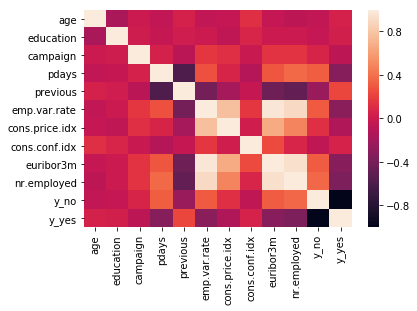

In [11]:
sns.heatmap((pd.get_dummies(data=train,columns=['y'])).corr())

Expectedly, there is a high correlation between the variables related to interest rates

The categorical variables (age, education, default, housing and loan) although highly correlated, are not as interesting as the economic factors or success of a previous campaign

   # Data Visualization

Distribution of Yes/No Answers

In [12]:
count_class_0, count_class_1 = train.y.value_counts()
count_class_2, count_class_3 = test.y.value_counts()

In [13]:
print(train.y.value_counts())

no     26629
yes     3859
Name: y, dtype: int64


In [14]:
print(test.y.value_counts())

no     2720
yes     370
Name: y, dtype: int64


In [15]:
# hist(x=train['y'],label= 'Train');
# hist(x=test['y'], label = 'Test');
# plt.legend()

#### Under sampling

I will under-sample the no category to get an accurate description of the dataset

In [16]:
train_0 = train[train['y']=='no'].sample(count_class_1)
train_1 = train[train['y']=='yes']
test_0 = test[test['y']=='no'].sample(count_class_3)
test_1 = test[test['y']=='yes']

In [17]:
train_under = pd.concat([train_0,train_1], axis=0)
test_under = pd.concat([test_0,test_1], axis=0)

Age distribution

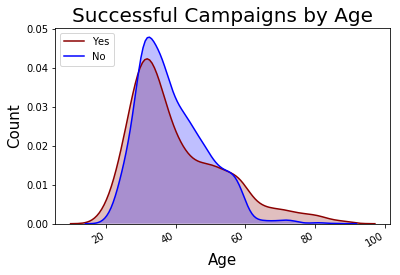

In [18]:
df = train_under[['age','y','pdays']]
fig = plt.figure()
ax = fig.gca()
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
fig.autofmt_xdate()
sns.kdeplot(df.loc[df.y =='yes','age'],shade=True,color="darkred", label="Yes")
sns.kdeplot(df.loc[df.y =='no','age'],shade=True,color="b",label="No")
plt.xlabel("Age", size = 15)
plt.ylabel("Count", size= 15)
plt.title("Successful Campaigns by Age", size = 20)
plt.legend(loc=2)
# plt.show()

In [19]:
def auto_plot(df,columns):
    for col in columns:
        fig = plt.figure(figsize=(10,5))
        ax = fig.gca()
        df1 = train_under[[col,'y']]
        sns.set(style="darkgrid")
        sns.countplot(data=df1,x=col,hue='y')
        ax.set_title("Successful Campaigns by " + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        fig.autofmt_xdate()
        plt.tight_layout()
        plt.show()
    return 'Done'


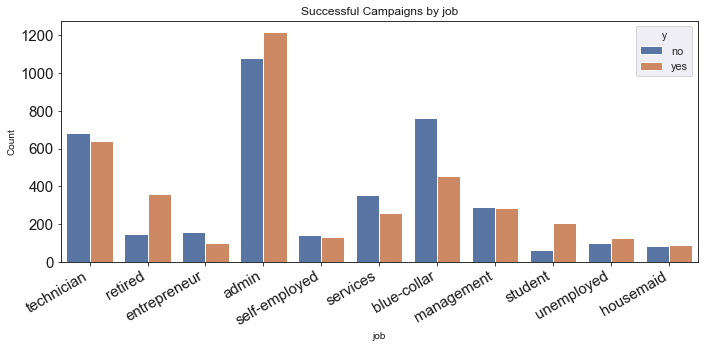

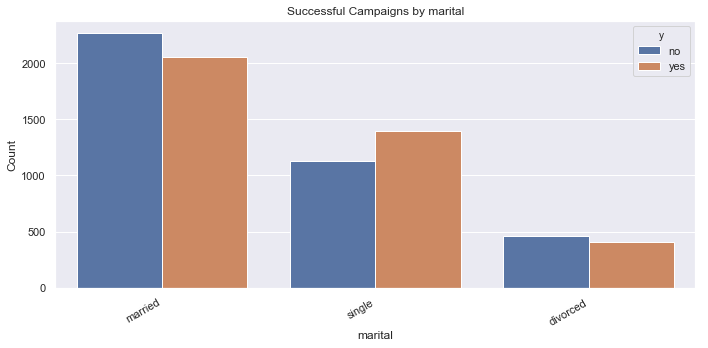

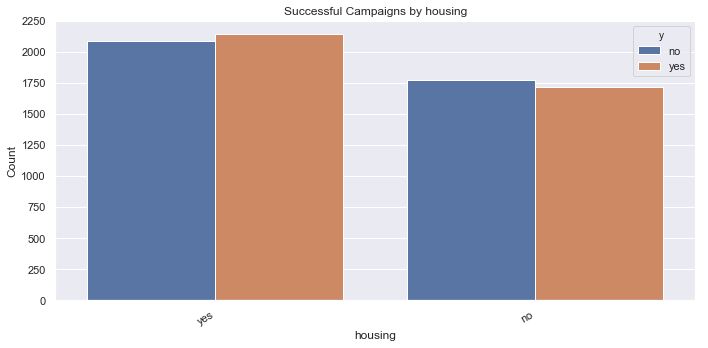

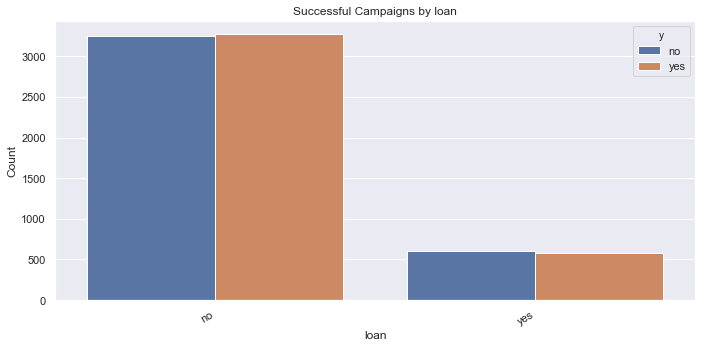

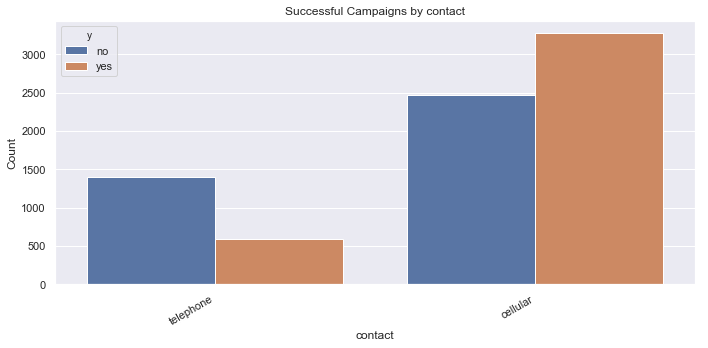

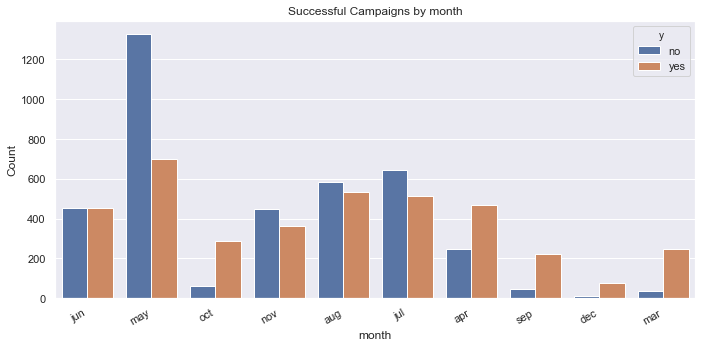

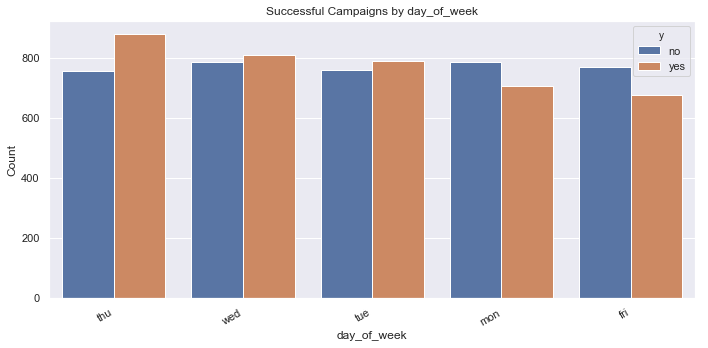

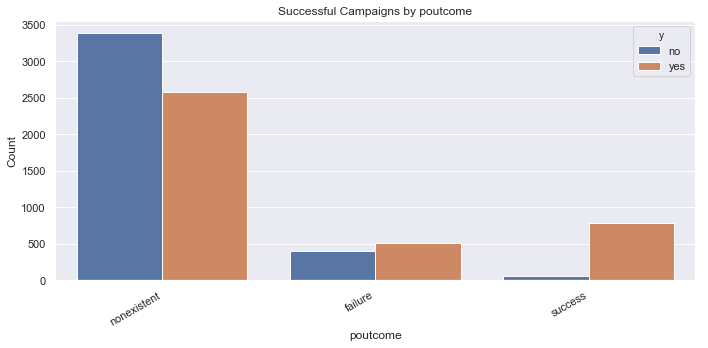

'Done'

In [20]:
groups = [i for i in train_under.columns if (dtype(train_under[str(i)]) == object)]
groups.remove('y')
groups.remove('default')
num_cols = [i for i in train_under.columns if (dtype(train_under[str(i)]) == float64)]
auto_plot(train_under,groups)


C:\Users\tochi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tochi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


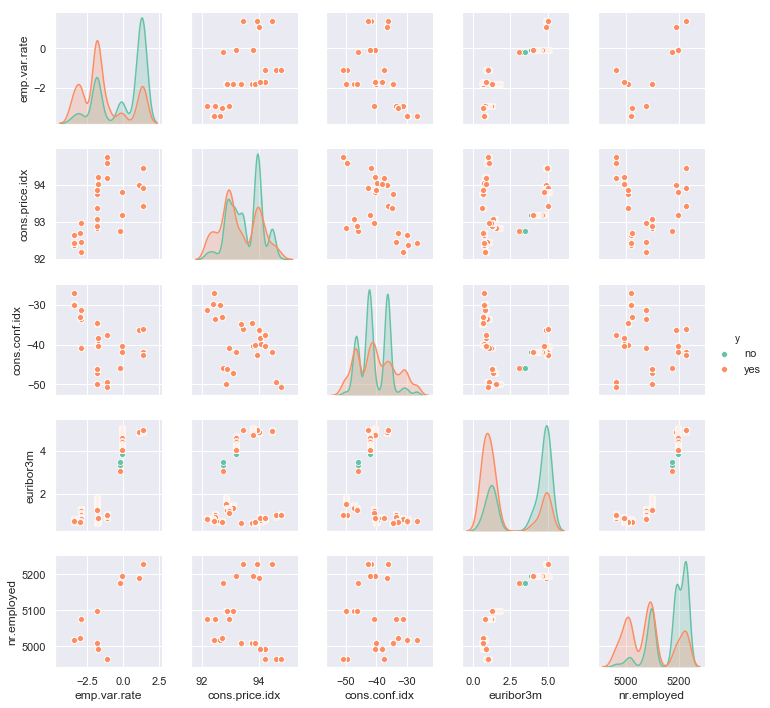

In [21]:
df = train_under[num_cols]
df['y'] = train_under['y']
sns.pairplot(df,hue='y',palette='Set2',size=2)

# Data Modelling and Validation

 First, let's look at a multiple logistic regression and decision trees. I will test a few logisitic regression models and then compare them to a decision tree.

In [22]:
train.replace(('yes','no'),(1,0),inplace=True)
test.replace(('yes','no'),(1,0),inplace=True)
traind = pd.get_dummies(train) # convert categorical variables to dummies
testd = pd.get_dummies(test)

In [23]:
kf = model_selection.KFold(n_splits=4,shuffle=True)

In [24]:
set1,set2,set3,set4 = kf.split(traind)

In [25]:
traind.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [26]:
dftrain1 = traind.iloc[set1[0],:]
dftest1 = traind.iloc[set1[1],:]
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = dftrain1[dftrain1.columns.difference(['y'])]
Y = dftrain1['y']
lgrg.fit(X,Y)

C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
dftrain1.head()

age  education  default  housing  loan  campaign  pdays  previous  \
0   56          4        0        0     0         1    999         0   
4   56         12        0        0     1         1    999         0   
6   59         14        0        0     0         1    999         0   
8   24         14        0        1     0         1    999         0   
9   25         12        0        1     0         1    999         0   

   emp.var.rate  cons.price.idx        ...         month_oct  month_sep  \
0           1.1          93.994        ...                 0          0   
4           1.1          93.994        ...                 0          0   
6           1.1          93.994        ...                 0          0   
8           1.1          93.994        ...                 0          0   
9           1.1          93.994        ...                 0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
4                0                1                0                0   
6                0                1                0                0   
8                0                1                0                0   
9                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0                0                 0                     1                 0  
4                0                 0                     1                 0  
6                0                 0                     1                 0  
8                0                 0                     1                 0  
9                0                 0                     1                 0  

[5 rows x 48 columns]

In [28]:
a = pd.DataFrame(dftest1)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict1 = pd.DataFrame(lgrg.predict((b)))
true1 = pd.DataFrame(Y1) 

In [29]:
score = lgrg.score(b,true1)
score

0.8890055103647336

It might help to include interaction terms in the regression. I will model that on the second set

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [32]:
dftrain2 = traind.iloc[set2[0],:]
dftest2 = traind.iloc[set2[1],:]
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = dftrain2[dftrain2.columns.difference(['y'])]
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform(X)
Y = dftrain2['y']
lgrg.fit(X,Y)

C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
a = pd.DataFrame(dftest2)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict2 = pd.DataFrame(lgrg.predict((b)))
true2= pd.DataFrame(Y1) 

In [34]:
score = lgrg.score(b,true2)
score

0.8895303070060352

The accuracy rate has dropped

In [35]:
cm = confusion_matrix(true2,predict2)
print(cm)
print(classification_report(true2,predict2))

[[6542  123]
 [ 719  238]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      6665
          1       0.66      0.25      0.36       957

avg / total       0.87      0.89      0.87      7622



For the third set, I will use a decision tree

In [36]:
dftrain3 = traind.iloc[set3[0],:]
dftest3 = traind.iloc[set3[1],:]
X = dftrain3[dftrain1.columns.difference(['y'])]
Y = dftrain3['y']

In [37]:
classifier = DecisionTreeClassifier()
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
a = pd.DataFrame(dftest3)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict3 = pd.DataFrame(classifier.predict((b)))
true3= pd.DataFrame(Y1) 

In [39]:
score = classifier.score(b,true3)
score

0.8219627394384676

In [40]:
cm = confusion_matrix(true3,predict3)
print(cm)
print(classification_report(true3,predict3))

[[5921  728]
 [ 629  344]]
             precision    recall  f1-score   support

          0       0.90      0.89      0.90      6649
          1       0.32      0.35      0.34       973

avg / total       0.83      0.82      0.83      7622



In [41]:
dftrain4 = traind.iloc[set4[0],:]
dftest4 = traind.iloc[set4[1],:]
X = dftrain4[dftrain1.columns.difference(['y'])]
Y = dftrain4['y']

Here I try to deal with the unbalanced dataset using class_weight in the classifier

In [42]:
classifier = DecisionTreeClassifier(class_weight='balanced')
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
a = pd.DataFrame(dftest4)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict4 = pd.DataFrame(classifier.predict((b)))
true4= pd.DataFrame(Y1) 

In [44]:
score = classifier.score(b,true4)
score

0.8315402781422199

In [45]:
cm = confusion_matrix(true4,predict4)
print(cm)
print(classification_report(true4,predict4))

[[6014  628]
 [ 656  324]]
             precision    recall  f1-score   support

          0       0.90      0.91      0.90      6642
          1       0.34      0.33      0.34       980

avg / total       0.83      0.83      0.83      7622



This has a slightly higher accuracy but does not do as well as the first logistic regression

The first logistic regression had the highest score, so I will use that model on the final test data.

In [46]:
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = testd[testd.columns.difference(['y'])]
Y = testd['y']
lgrg.fit(X,Y)

C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
a = pd.DataFrame(testd)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predictions = pd.DataFrame(lgrg.predict((b)))
true_values = pd.DataFrame(Y1) 

In [48]:
score = lgrg.score(b,true_values)
score

0.8941747572815534

In [50]:
cm = confusion_matrix(true1,predict1)
print(cm)
print(classification_report(true_values,predictions))

[[6534  139]
 [ 707  242]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2720
          1       0.66      0.24      0.35       370

avg / total       0.88      0.89      0.87      3090

